# Actividad grupal: Árboles y Random Forest para regresión

* Esta practica esta realizada por el grupo numero 10 que esta comprendido por los siguientes alumnos:
    * Pablo Carrillo Carrasco.
    * Francisco Perez Almendro.
    * Javier Bueno Morales.
    * Jose Manuel Alcaide Carrera.

* Objetivo de la actividad es:

* Aplicar al conjunto de datos proporcionado los métodos o algoritmos Árboles de decision y Random Forest para predecir (regresión) el número de ventas de bicicletas por hora , la varible es "cnt".


* Descripción de la actividad:

* 1.- Análisis descriptivo de los datos.
* 2.- Determinar el conjunto de modelización y el de validación.
* 3.- Tratamiento de missing (si los hay).
* 4.- Tratamiento de variables categóricas.
* 5.- Calcular las métricas de evaluación de ajuste adecuadas.
* 6.- Comparar mediante las medidas que parezcan adecuadas la capacidad predictiva de ambos métodos.
* 7.- Comentar los resultados obtenidos.
* 8.- Otros comentarios que parezcan adecuados.
* 9.-Repite el ejercicio haciendo el siguiente grupo y desarrollando un algoritmo de clasificación: grupo 1 si cnt<=20, grupo 2 en otro caso.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
random.seed(10)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

* Cargamos todo el material necesario para realizar la práctica, tanto librerias como métodos.

In [2]:
data_day = pd.read_csv("day.csv")

In [3]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data_day.shape

(731, 16)

* Suman 731 dias, pues el año 2011 tiene 365 dias y el año 2012 tiene 366 dias pues fue bisiesto.

In [5]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
data_hour = pd.read_csv("hour.csv")

In [8]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
data_hour.shape

(17379, 17)

In [10]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


* Explicacion breve de las variables: 
    * instant: índice de registro
        
    * dteday: fecha.
        
    * season: estacion del año:
            
            1 = spring(primavera)
            2 = summer(verano)
            3 = fall(otoño)
            4 = winter(invierno)
            
    * yr: year(año): 
            
        * 0 = 2011
        * 1 = 2012
        
    * mnth : month(mes)
        
        * 1 = january(enero)
        .....
        * 12 = december(diciembre)
    
    * hr: hora
        
        * 0h hasta 23h
        
    * holiday = si es dia de vacaciones o no.
    
        * 0 = NO es dia de vacaciones
        * 1 = SI es dia de vacaciones
        
    * weekday = dia de la semana
        * 0 = 
        ....
        
        * 6 = 
    * workingday: Si es dia laborable o no
        
        * 0 = No laborable
        * 1 = SI Laborable
        
    * weathersit: Tiempo 
        
        * 1 = Despejado, pocas nubes, parcialmente nublado, parcialmente nublado
        * 2 = Niebla + Nublado, Niebla + Nubes rotas, Niebla + Pocas nubes, Niebla
        * 3 = Nieve ligera, lluvia ligera + tormenta eléctrica + nubes dispersas, lluvia ligera + nubes 
        * 4 = Fuerte lluvia + paletas de hielo + tormenta eléctrica + niebla, nieve + niebla
    
    * temp: Temperatura normalizada en grados Celsius. Los valores se dividen en 41 (máx.)
    * atemp: Temperatura de sensación normalizada en grados Celsius. Los valores se dividen en 50 (máx.)
    * hum: Humedad normalizada. Los valores se dividen en 100 (máx.)
    * windspeed: Velocidad del viento normalizada. Los valores se dividen en 67 (máx.)
    * casual: Recuento de usuarios ocasionales
    * registered: recuento de usuarios registrados.
    * cnt: Recuento del total de bicicletas de alquiler, tanto casuales como registradas

In [11]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


* Con esta funcion nos analiza los estadisticos basicos de las variables numericas del datframe 

* Eliminamos la variable 'instant', pues no nos aporta nada para nuestro estudio, ya que es un simple indice contador.

In [12]:
data_day.drop('instant',axis=1,inplace=True)

In [13]:
data_hour.drop('instant',axis=1,inplace=True)

* Notas:
* 1 .-Para aplicar los modelos predictivos vamos a usar el dataframe de data_hour porque el data_day esta incluido en el primero.
* 2.- Para hacer representaciones graficas y ver como se distribuyen las variables, usamos el dataframe data_day

C:\Users\pacop\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


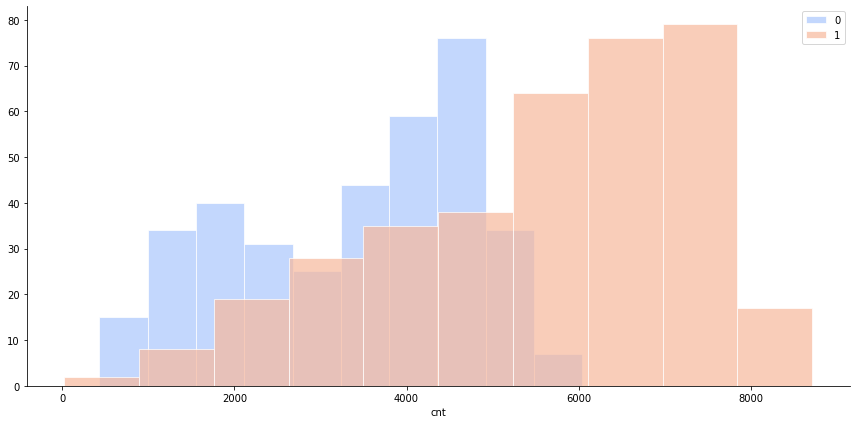

In [14]:
g=sns.FacetGrid(data_day, hue='yr', palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'cnt',alpha=0.7, edgecolor='w')
plt.legend()

* Observamos que en año 1 (2012) el conteo final es mayor que en año anteior, es decir ha habido un aumento de alquileres de bicicletas, en general

Text(0.5, 1.0, 'Number of bikes rented per season')

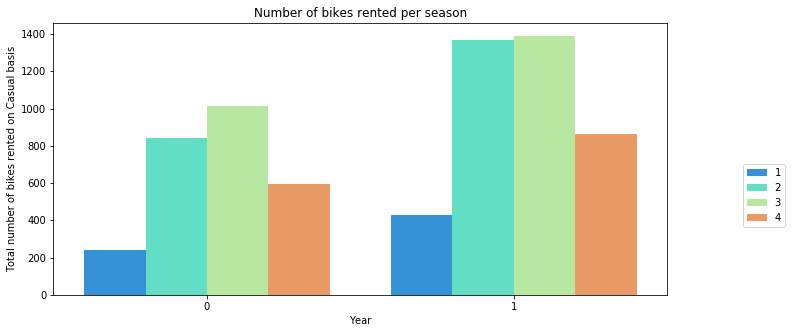

In [15]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=data_day,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

* Teniendo en cuanta solo los alquileres ocasionales(usuarios no regitrados), la estacion del año y el en que año .Se observa un claro aumento de los alquileres ocasionales en cada estacion en comparacion con los años.

Text(0.5, 1.0, 'Number of bikes rented per season')

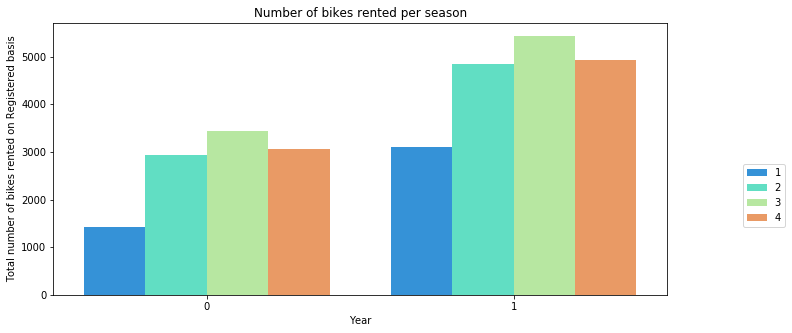

In [16]:
plt.figure(figsize=(11,5))
sns.barplot('yr','registered',hue='season', data=data_day,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

* Ocurre lo mismo, ha habido un aumento de alquileres de bicicletas de clientes registrados todas las estaciones del año 2012 en comparacion con el 2011

Text(0.5, 1.0, 'Number of bikes rented per season')

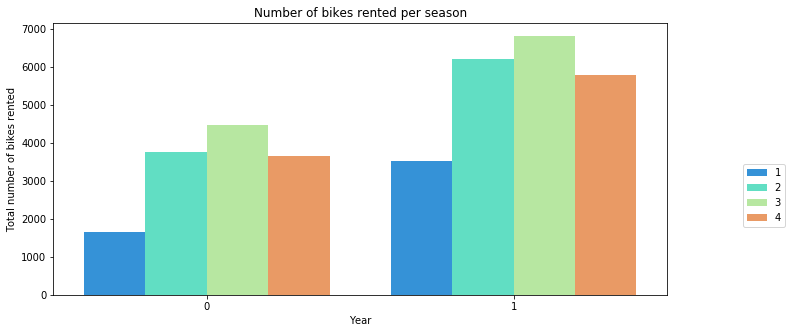

In [17]:
plt.figure(figsize=(11,5))
sns.barplot('yr','cnt',hue='season', data=data_day,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')

* Por tanto, si unimos ambos tipos de clientes por estacion dela año, tambien crecerá 2012 con respecto a 2011

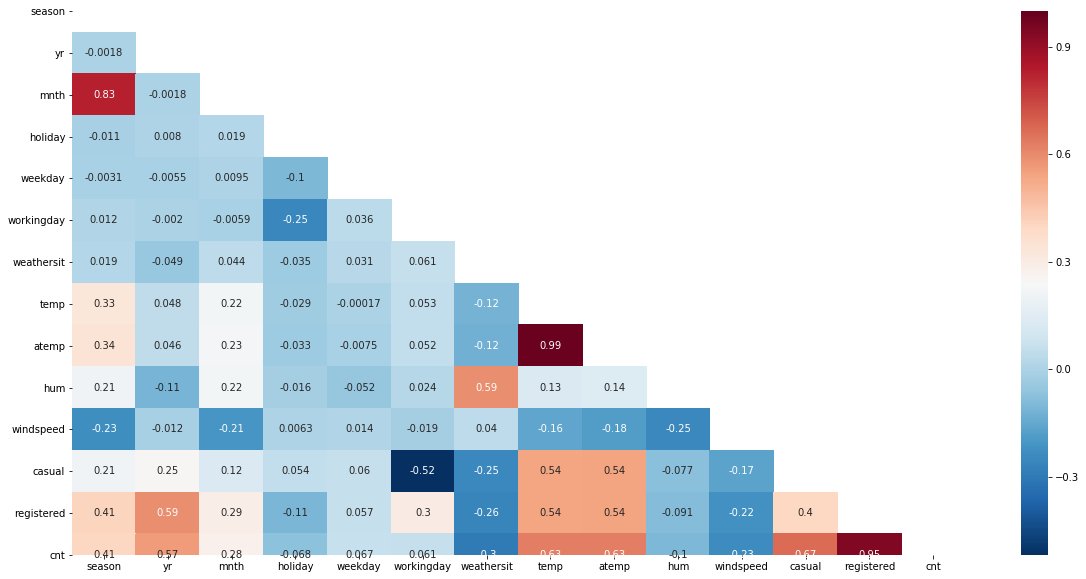

In [18]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(data_day.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_day.corr(),cmap='RdBu_r',mask=mask, annot=True)

* Nos basamos en el data_day para ver la posibles correlaciones entre variables, destacamos: 
    * Por supuesto entre ellas misma la correlacion es la maxima, 1.
    * Existe una correlacion alta positiva entre casual y registred.
    * Existe una correlacion alta positiva entre temp y atemp.
    * Existe una correlacion alta positiva entre month y season.

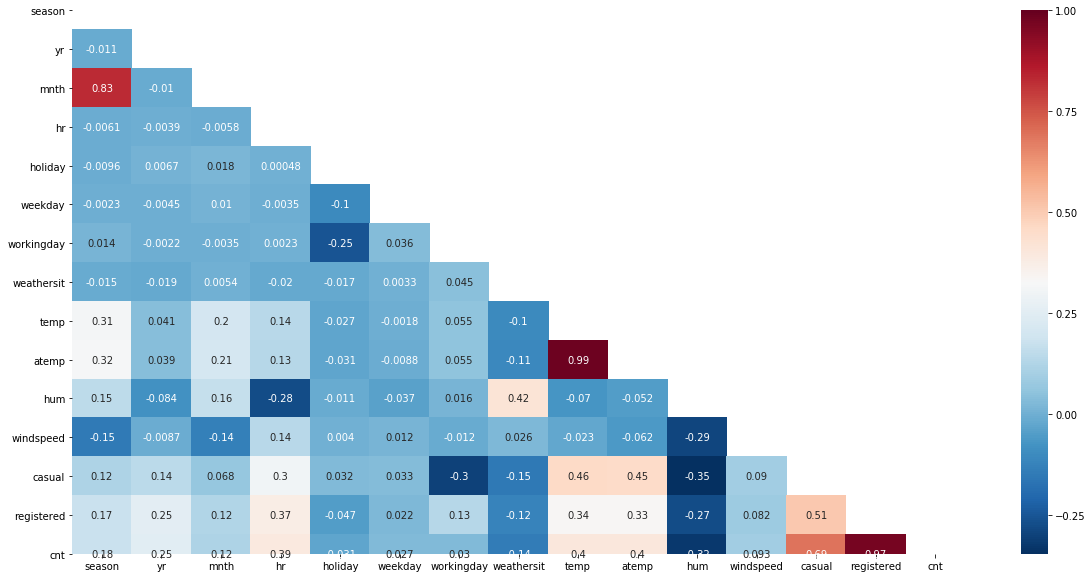

In [19]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(data_hour.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_hour.corr(),cmap='RdBu_r',mask=mask, annot=True)

* Se pueden sacar las mismas conclusiones de esta matriz de correlaciones pero analizando data_hour

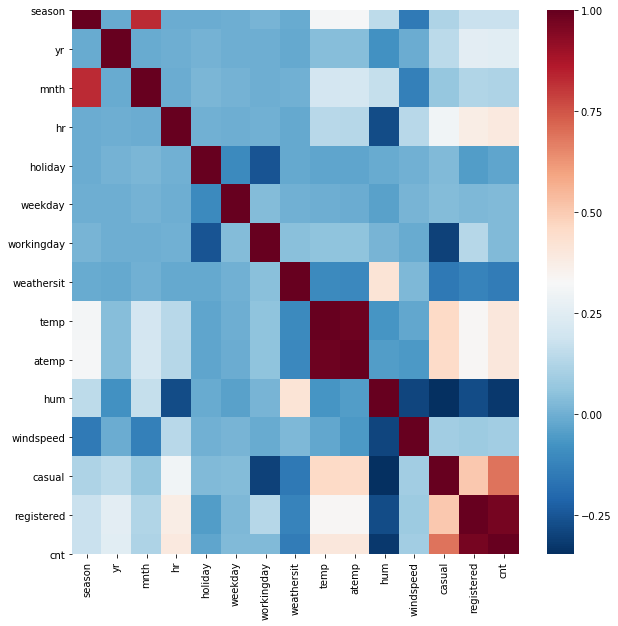

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data_hour.corr(),cmap='RdBu_r')

* Es otra forma de expresar la matriz de correlaciones.

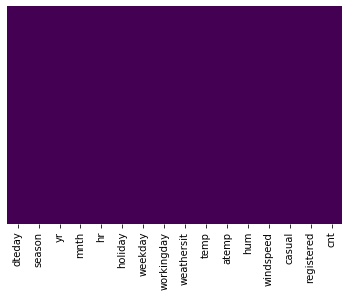

In [21]:
sns.heatmap(data_hour.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Una forma de ver si existen valores nulos en el dataset es hacer una representación gráfica y observamos que no exiten valores nulos

* TRANSFORMACIÓN DE VARIABLES PARA PODER APLICAR LOS MODELOS

In [22]:
season=pd.get_dummies(data_hour['season'],prefix='season')
data_hour=pd.concat([data_hour,season],axis=1)
data_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0


* Creamos variables 4 nuevas dummies para la variable original 'season' de tal forma que:
    * season_1 = 1 , si el valor de la variable original season = 1, y cero en cualquier otro caso.
    * season_2 = 1 , si el valor de la variable original season = 2, y cero en cualquier otro caso.
    * season_3 = 1 , si el valor de la variable original season = 3, y cero en cualquier otro caso.
    * season_4 = 1 , si el valor de la variable original season = 4, y cero en cualquier otro caso.

In [23]:
weather=pd.get_dummies(data_hour['weathersit'],prefix='weathersit')
data_hour=pd.concat([data_hour,weather],axis=1)
data_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,...,13,16,1,0,0,0,1,0,0,0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,...,32,40,1,0,0,0,1,0,0,0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,...,27,32,1,0,0,0,1,0,0,0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,...,10,13,1,0,0,0,1,0,0,0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,...,1,1,1,0,0,0,1,0,0,0


* Hacemos lo mismo con la variable original 'weathersit'

In [24]:
data_hour.drop(['season','weathersit'],inplace=True,axis=1)
data_hour.head()

,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,...,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,2011-01-01,0,1,0,0,6,0,0.24,0.2879,0.81,...,13,16,1,0,0,0,1,0,0,0
1,2011-01-01,0,1,1,0,6,0,0.22,0.2727,0.80,...,32,40,1,0,0,0,1,0,0,0
2,2011-01-01,0,1,2,0,6,0,0.22,0.2727,0.80,...,27,32,1,0,0,0,1,0,0,0
3,2011-01-01,0,1,3,0,6,0,0.24,0.2879,0.75,...,10,13,1,0,0,0,1,0,0,0
4,2011-01-01,0,1,4,0,6,0,0.24,0.2879,0.75,...,1,1,1,0,0,0,1,0,0,0


* Eliminamos las variables originales para evitar correlaciones entre ellas

In [25]:
data_hour["day"] = [t.dayofweek for t in pd.DatetimeIndex(data_hour.dteday)]
data_hour["month"] = [t.month for t in pd.DatetimeIndex(data_hour.dteday)]
data_hour['year'] = [t.year for t in pd.DatetimeIndex(data_hour.dteday)]
data_hour['year'] = data_hour['year'].map({2011:0, 2012:1})
data_hour.head()

,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,...,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
0,2011-01-01,0,1,0,0,6,0,0.24,0.2879,0.81,...,0,0,0,1,0,0,0,5,1,0
1,2011-01-01,0,1,1,0,6,0,0.22,0.2727,0.80,...,0,0,0,1,0,0,0,5,1,0
2,2011-01-01,0,1,2,0,6,0,0.22,0.2727,0.80,...,0,0,0,1,0,0,0,5,1,0
3,2011-01-01,0,1,3,0,6,0,0.24,0.2879,0.75,...,0,0,0,1,0,0,0,5,1,0
4,2011-01-01,0,1,4,0,6,0,0.24,0.2879,0.75,...,0,0,0,1,0,0,0,5,1,0


* Dividimos la variable original 'dteday' que es del tipo fecha, en partes, correspondientes a dia, mes y año. Y esta ultima que tome 2 valores 0 si es 2011 y 1 si es 2012

In [26]:
data_hour.drop('dteday',axis=1,inplace=True)
data_hour.head()

,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
0,0,1,0,0,6,0,0.24,0.2879,0.81,0.0,...,0,0,0,1,0,0,0,5,1,0
1,0,1,1,0,6,0,0.22,0.2727,0.80,0.0,...,0,0,0,1,0,0,0,5,1,0
2,0,1,2,0,6,0,0.22,0.2727,0.80,0.0,...,0,0,0,1,0,0,0,5,1,0
3,0,1,3,0,6,0,0.24,0.2879,0.75,0.0,...,0,0,0,1,0,0,0,5,1,0
4,0,1,4,0,6,0,0.24,0.2879,0.75,0.0,...,0,0,0,1,0,0,0,5,1,0


In [27]:
data_hour.drop(['yr', 'mnth'],axis=1,inplace=True)
data_hour.head()

,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
0,0,0,6,0,0.24,0.2879,0.81,0.0,3,13,...,0,0,0,1,0,0,0,5,1,0
1,1,0,6,0,0.22,0.2727,0.80,0.0,8,32,...,0,0,0,1,0,0,0,5,1,0
2,2,0,6,0,0.22,0.2727,0.80,0.0,5,27,...,0,0,0,1,0,0,0,5,1,0
3,3,0,6,0,0.24,0.2879,0.75,0.0,3,10,...,0,0,0,1,0,0,0,5,1,0
4,4,0,6,0,0.24,0.2879,0.75,0.0,0,1,...,0,0,0,1,0,0,0,5,1,0


* Borramos las columnas que estan duplicadas

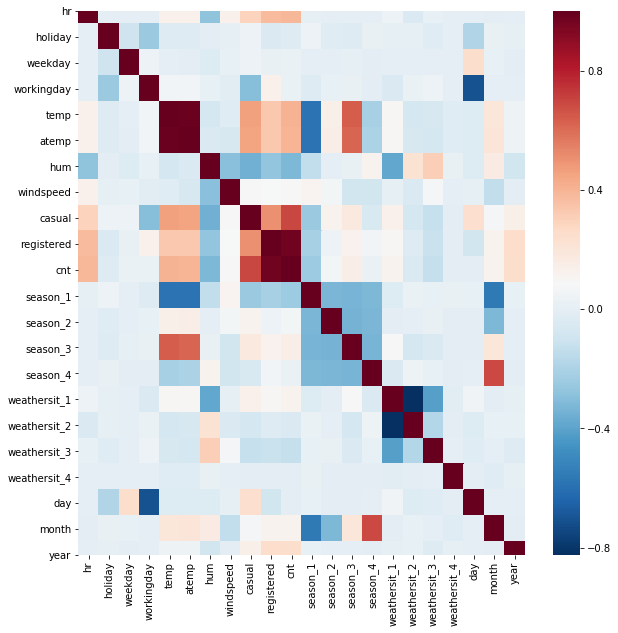

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(data_hour.corr(),cmap='RdBu_r')

* Veamos que han desaparecido las correlaciones altas que existian con anterioridad, solo queda 'casual' y 'registered' que las eliminamos pues nos interesa la variable 'cnt' que es la suma de estas dos

In [29]:
data_hour.drop(['casual','registered'],axis=1,inplace=True)
data_hour.head()

,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
0,0,0,6,0,0.24,0.2879,0.81,0.0,16,1,0,0,0,1,0,0,0,5,1,0
1,1,0,6,0,0.22,0.2727,0.80,0.0,40,1,0,0,0,1,0,0,0,5,1,0
2,2,0,6,0,0.22,0.2727,0.80,0.0,32,1,0,0,0,1,0,0,0,5,1,0
3,3,0,6,0,0.24,0.2879,0.75,0.0,13,1,0,0,0,1,0,0,0,5,1,0
4,4,0,6,0,0.24,0.2879,0.75,0.0,1,1,0,0,0,1,0,0,0,5,1,0


* Usando el dataframe con las modificaciones, vamos a realizar unos graficos para ver como se distribuyen las variables

C:\Users\pacop\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pacop\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


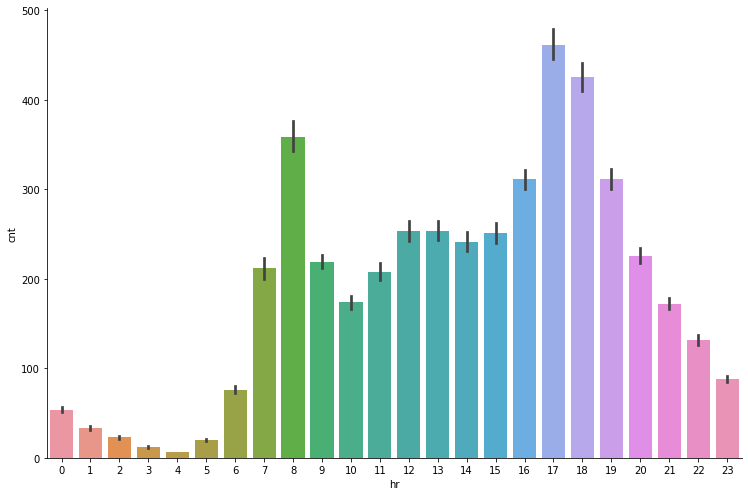

In [30]:
sns.factorplot(x="hr",y="cnt",data=data_hour,kind='bar',size=7,aspect=1.5)

* Vemos que la mayor hora para alquilar biciclemas es entre las 7 y 9 de la mañana y entre las 16 y 19. Tiene sentido, ya que podemos imaginar que es cuando mas se trasladan los usuarios a sus lugares de trabajo

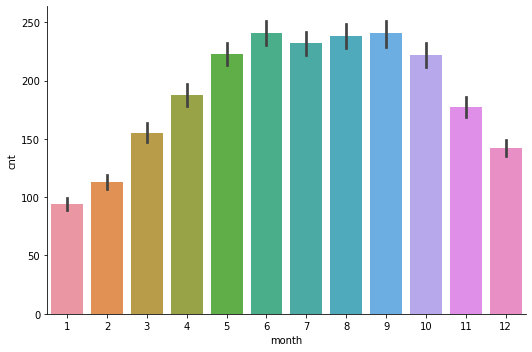

In [31]:
sns.factorplot(x="month",y="cnt",data=data_hour,kind='bar',size=5,aspect=1.5)

* Los meses en los que mas se alquila, coinciden con los que hace mejor tiempo.

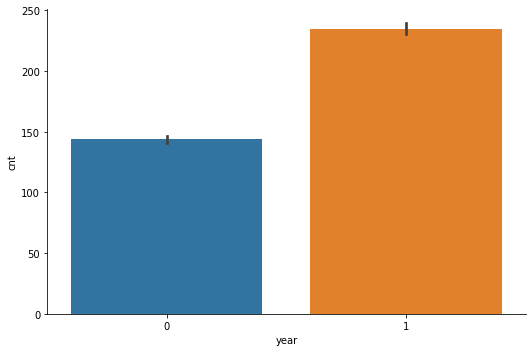

In [32]:
sns.factorplot(x="year",y="cnt",data=data_hour,kind='bar',size=5,aspect=1.5)

* Una forma rapida de ver el alquiler de las bicis por año, y observar su aumento

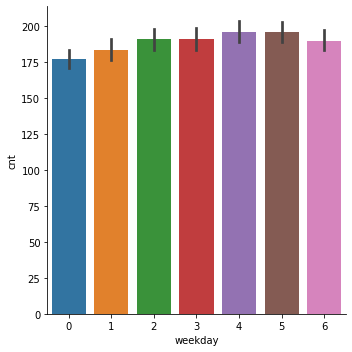

In [33]:
sns.factorplot(x="weekday",y='cnt',kind='bar',data=data_hour,size=5,aspect=1)

* En principio, no hay mucha diferencia en la cantidad de bicis alquiladas independientemente del día de la semana

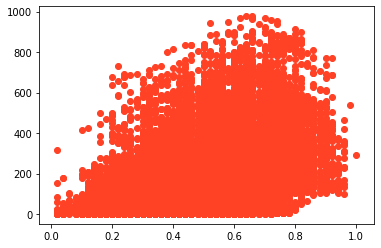

In [34]:
plt.scatter(x="temp",y="cnt",data=data_hour,color='#ff4125')

* Cuanta mayor temperatura, mayor es el número de bicis que se alquilan.

# MODELO DE ARBOL DE DECISION CON TRES PROFUNDIDADES MAXIMAS DE HOJAS 2, 5 Y 10

* Trabajamos a partir del dataframe para realizar el estudio.

In [35]:
Y=data_hour['cnt']
X=data_hour.drop(['cnt'],axis=1)

In [36]:
X.shape

(17379, 19)

In [37]:
Y.shape

(17379,)

In [38]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2,shuffle=True)

* Los parametros de un modelo de árboles de decisión son:
    * max_depth: la profundidad máxima del árbol. Debemos utilizar max_depth = 2, 5 y 10
    * min_samples_split: número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.
    * min_samples_leaf: número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.
    * max_leaf_nodes: número máximo de nodos finales

In [39]:
adr2 = DecisionTreeRegressor(max_depth=2)
adr5 = DecisionTreeRegressor(max_depth=5)
adr10 = DecisionTreeRegressor(max_depth=10)

* El nombre del modelo es adr

In [40]:
adr2.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [41]:
adr5.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [42]:
adr10.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

* Ajustamos los modelos

In [43]:
Y_pred_adr2 = adr2.predict(X_test)
Y_pred_adr5 = adr5.predict(X_test)
Y_pred_adr10 = adr10.predict(X_test)

* Realizamos la prediccion

In [44]:
print('DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 2')
print()
print('MSE: ')
print( mean_squared_error(Y_test, Y_pred_adr2))
print('r^2: ')
print( r2_score(Y_test, Y_pred_adr2))

DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 2

MSE: 
19930.63135864139
r^2: 
0.4158890578932378


In [45]:
print('DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 5')
print()
print('MSE: ')
print( mean_squared_error(Y_test, Y_pred_adr5))
print('r^2: ')
print( r2_score(Y_test, Y_pred_adr5))

DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 5

MSE: 
11698.154345762365
r^2: 
0.6571598845587521


In [46]:
print('DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 10')
print()
print('MSE: ')
print( mean_squared_error(Y_test, Y_pred_adr10))
print('r^2: ')
print( r2_score(Y_test, Y_pred_adr10))

DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 10

MSE: 
3584.513984575763
r^2: 
0.8949479420471235


# MODELO DE RANDOM FOREST CON TRES PROFUNDIDADES MAXIMAS DE HOJAS 2, 5 Y 10

Estos son los hiper-parámetros más útiles:

Propios del Bosque Aleatorio:

* n_estimators: número de árboles que va a tener el bosque aleatorio. Normalmente cuantos más mejor, pero a partir de cierto punto deja de mejorar y sólo hace que vaya más lento. Un buen valor por defecto puede ser el uso de 100 árboles.
* n_jobs: número de cores que se pueden usar para entrenar los árboles. Cada árbol es independiente del resto, así que entrenar un bosque aleatorio es una tarea muy paralelizable. Por defecto sólo utiliza 1 core de la CPU. Para mejorar el rendimiento puedes usar tantos cores como estimes necesario. Si usas n_jobs = -1, estás indicando que quieres usar tantos cores como tenga tu máquina.
* max_features: usa forma de garantizar que los árboles son diferentes, es que todos se entrenan con una muestra aleatoria de los datos. Si queremos que todavía sean más diferentes, podemos hacer que distintos árboles usen distintos atributos. Esto puede ser útil especialmente cuando algunos atributos están relacionados entre sí. 

Regularización (también disponibles para Decision Trees):

* max_depth: la profundidad máxima del árbol. En los ejemplos anteriores hemos usado max_depth = 2
* min_samples_split: número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.
* min_samples_leaf: número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.
* max_leaf_nodes: número máximo de nodos finales

In [47]:
Y=data_hour['cnt']
X=data_hour.drop(['cnt'],axis=1)

In [48]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2,shuffle=True)

In [49]:
bar2 = RandomForestRegressor(n_estimators=500, max_depth=2)
bar5 = RandomForestRegressor(n_estimators=500, max_depth=5)
bar10 = RandomForestRegressor(n_estimators=500, max_depth=10)

In [50]:
bar2.fit(X_train, Y_train)
bar5.fit(X_train, Y_train)
bar10.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
Y_pred_bar2 = bar2.predict(X_test)
Y_pred_bar5 = bar5.predict(X_test)
Y_pred_bar10= bar10.predict(X_test)

In [52]:
print('DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 2')
print()
print('MSE: ')
print( mean_squared_error(Y_test, Y_pred_bar2))
print('r^2: ')
print( r2_score(Y_test, Y_pred_bar2))

DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 2

MSE: 
20604.36049883702
r^2: 
0.38636774387542194


In [53]:
print('DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 5')
print()
print('MSE: ')
print( mean_squared_error(Y_test, Y_pred_bar5))
print('r^2: ')
print( r2_score(Y_test, Y_pred_bar5))

DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 5

MSE: 
11736.77277424958
r^2: 
0.6504593113923238


In [54]:
print('DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 10')
print()
print('MSE: ')
print( mean_squared_error(Y_test, Y_pred_bar10))
print('r^2: ')
print( r2_score(Y_test, Y_pred_bar10))

DATOS DEL MODELO DE BOSQUES ALEATORIOS REGRESION CON 500 ARBOLES Y PROFUNDIDAD DEL ARBOL DE 10

MSE: 
2619.3246620550217
r^2: 
0.9219921384121438


# Repite el ejercicio haciendo el siguiente grupo y desarrollando un algoritmo de clasificación: grupo 1 si cnt<=20, grupo 2 en otro caso.

* Para realizar esta parte hemos decidido en crear dos nuevos dataframes:
    * data_hour2 que contiene en la columna 'cnt' solo los valores menor o igual a 20.
    * data_hour3 que contiene en la columna 'cnt' solo los valores mayor de 20.
* Despues los unimos con un merge y hacemos un sample para que mezcle las observaciones, pues aparecen ordenadas con respecto a los valores de la variable 'cnt', es decir, todos los valores de 1 y a continuacion todos los que contienen los valores 2. 


In [55]:
data_hour2 = data_hour[data_hour['cnt'] <= 20]

In [56]:
data_hour2.head()

,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
0,0,0,6,0,0.24,0.2879,0.81,0.0000,16,1,0,0,0,1,0,0,0,5,1,0
3,3,0,6,0,0.24,0.2879,0.75,0.0000,13,1,0,0,0,1,0,0,0,5,1,0
4,4,0,6,0,0.24,0.2879,0.75,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
5,5,0,6,0,0.24,0.2576,0.75,0.0896,1,1,0,0,0,0,1,0,0,5,1,0
6,6,0,6,0,0.22,0.2727,0.80,0.0000,2,1,0,0,0,1,0,0,0,5,1,0


In [57]:
data_hour2.shape

(2994, 20)

In [58]:
data_hour2['cnt'] = 1

C:\Users\pacop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
data_hour2.head()

,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
0,0,0,6,0,0.24,0.2879,0.81,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
3,3,0,6,0,0.24,0.2879,0.75,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
4,4,0,6,0,0.24,0.2879,0.75,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
5,5,0,6,0,0.24,0.2576,0.75,0.0896,1,1,0,0,0,0,1,0,0,5,1,0
6,6,0,6,0,0.22,0.2727,0.80,0.0000,1,1,0,0,0,1,0,0,0,5,1,0


In [60]:
data_hour3 = data_hour[data_hour['cnt'] > 20]

In [61]:
data_hour3.shape

(14385, 20)

In [62]:
data_hour3.head()

,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
1,1,0,6,0,0.22,0.2727,0.80,0.0000,40,1,0,0,0,1,0,0,0,5,1,0
2,2,0,6,0,0.22,0.2727,0.80,0.0000,32,1,0,0,0,1,0,0,0,5,1,0
10,10,0,6,0,0.38,0.3939,0.76,0.2537,36,1,0,0,0,1,0,0,0,5,1,0
11,11,0,6,0,0.36,0.3333,0.81,0.2836,56,1,0,0,0,1,0,0,0,5,1,0
12,12,0,6,0,0.42,0.4242,0.77,0.2836,84,1,0,0,0,1,0,0,0,5,1,0


In [63]:
data_hour3['cnt'] = 2

C:\Users\pacop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
data_hour3.head()

,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
1,1,0,6,0,0.22,0.2727,0.80,0.0000,2,1,0,0,0,1,0,0,0,5,1,0
2,2,0,6,0,0.22,0.2727,0.80,0.0000,2,1,0,0,0,1,0,0,0,5,1,0
10,10,0,6,0,0.38,0.3939,0.76,0.2537,2,1,0,0,0,1,0,0,0,5,1,0
11,11,0,6,0,0.36,0.3333,0.81,0.2836,2,1,0,0,0,1,0,0,0,5,1,0
12,12,0,6,0,0.42,0.4242,0.77,0.2836,2,1,0,0,0,1,0,0,0,5,1,0


In [65]:
data_hour_inner = pd.merge(left=data_hour2, right=data_hour3, how="outer")

In [66]:
data_hour_inner.shape

(17379, 20)

In [67]:
data_hour_inner.head(20)

,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
0,0,0,6,0,0.24,0.2879,0.81,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
1,3,0,6,0,0.24,0.2879,0.75,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
2,4,0,6,0,0.24,0.2879,0.75,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
3,5,0,6,0,0.24,0.2576,0.75,0.0896,1,1,0,0,0,0,1,0,0,5,1,0
4,6,0,6,0,0.22,0.2727,0.80,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
5,7,0,6,0,0.20,0.2576,0.86,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
6,8,0,6,0,0.24,0.2879,0.75,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
7,9,0,6,0,0.32,0.3485,0.76,0.0000,1,1,0,0,0,1,0,0,0,5,1,0
8,0,0,0,0,0.46,0.4545,0.88,0.2985,1,1,0,0,0,0,1,0,0,6,1,0
9,1,0,0,0,0.44,0.4394,0.94,0.2537,1,1,0,0,0,0,1,0,0,6,1,0


In [68]:
data_hour_inner.tail(20)

,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
17359,23,0,0,0,0.20,0.1970,0.51,0.2239,2,1,0,0,0,1,0,0,0,6,12,1
17360,0,0,1,1,0.18,0.1818,0.55,0.1940,2,1,0,0,0,1,0,0,0,0,12,1
17361,6,0,1,1,0.16,0.1667,0.64,0.1642,2,1,0,0,0,1,0,0,0,0,12,1
17362,7,0,1,1,0.16,0.1818,0.64,0.1343,2,1,0,0,0,1,0,0,0,0,12,1
17363,8,0,1,1,0.14,0.1515,0.69,0.1343,2,1,0,0,0,1,0,0,0,0,12,1
17364,9,0,1,1,0.18,0.2121,0.64,0.1045,2,1,0,0,0,0,1,0,0,0,12,1
17365,10,0,1,1,0.20,0.2121,0.69,0.1343,2,1,0,0,0,0,1,0,0,0,12,1
17366,11,0,1,1,0.22,0.2273,0.60,0.1940,2,1,0,0,0,0,1,0,0,0,12,1
17367,12,0,1,1,0.24,0.2273,0.56,0.1940,2,1,0,0,0,0,1,0,0,0,12,1
17368,13,0,1,1,0.26,0.2576,0.44,0.1642,2,1,0,0,0,0,1,0,0,0,12,1


In [69]:
data_hour_inner_sample = data_hour_inner.sample(frac=1)

In [70]:
data_hour_inner_sample.head()

,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day,month,year
5039,16,0,4,1,0.62,0.5909,0.78,0.2537,2,0,1,0,0,1,0,0,0,3,4,0
4628,22,0,3,1,0.46,0.4545,0.41,0.2836,2,0,1,0,0,1,0,0,0,2,4,0
15326,8,0,3,1,0.52,0.5000,0.59,0.2239,2,0,0,1,0,1,0,0,0,2,9,1
13274,19,0,3,1,0.70,0.6364,0.34,0.3881,2,0,1,0,0,1,0,0,0,2,6,1
12866,10,0,5,1,0.68,0.6364,0.79,0.1642,2,0,1,0,0,1,0,0,0,4,5,1


In [71]:
data_hour_inner_sample.shape

(17379, 20)

# ARBOL DE DECISION CLASIFICACION

In [72]:
Y=data_hour_inner_sample['cnt']
X=data_hour_inner_sample.drop(['cnt'],axis=1)

In [73]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2,shuffle=True)

In [74]:
max_depth = range(1,10)
max_feature = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid_DT = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid_DT.fit(X, Y) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
        

In [75]:
print( grid_DT.best_params_)
print (grid_DT.best_score_)
print (grid_DT.best_estimator_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 18}
0.9611600207146557
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=18, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [76]:
Y_pred_DT = grid_DT.predict(X_test)

In [77]:
matriz = confusion_matrix(Y_test, Y_pred_DT)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 559   40]
 [  36 2841]]


In [78]:
dectree_grid = grid_DT.best_estimator_
dectree_grid.score(X,Y)

0.9769261752690028

In [79]:
print(f1_score(Y_test, Y_pred_DT))

0.9363484087102178


* Para usar menos memoria y realizar varios modelos a la vez, hemos usado la funcion "GridSearchCV" ya que tiene varios parametros que nos ayuda a ello.
    * max_depth = range(1,10), indica el numero de hojas de cada arbol
    * max_feature = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,'auto'], elige el numero de variables para hacer el arbol, desde 1 hasta 19 (quitando la variable target), incluimos el parametro auto para que elija en caso contrario de forma automatica.
    * criterion=["entropy", "gini"], dos criterios para crear los arboles. que use los dos y elija el que mejor resultado de los dos.
    * StratifiedKFold(n_splits=20, random_state=15, shuffle=True) = Incluimos que realice el crossvalidation para asegurar la indepencencia de las muestras y mejorar el resultado


* En nuestro caso el mejor alrbol tiene las caractaristicas, con el criterio 'gini', con 7 nodos de profundidad y con las 19 variables nos devuelve un valor de 0.91 para la medida f1.

# RANDOM FOREST CLASIFICACION

In [80]:
Y=data_hour_inner_sample['cnt']
X=data_hour_inner_sample.drop(['cnt'],axis=1)

In [81]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2,shuffle=True)

In [82]:
n_estimators = [100,200,300,400,500];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid_RF= GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid_RF.fit(X,Y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              ran

In [83]:
print (grid_RF.best_score_)
print (grid_RF.best_params_)
print (grid_RF.best_estimator_)

0.9600115074798619
{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [84]:
rf_grid = grid_RF.best_estimator_
rf_grid.score(X,Y)

0.976005523908165

In [85]:
Y_pred_RF = grid_RF.predict(X_test)

In [86]:
print(classification_report(Y_test, Y_pred_RF, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           1       0.95      0.92      0.94       634
           2       0.98      0.99      0.99      2842

    accuracy                           0.98      3476
   macro avg       0.97      0.96      0.96      3476
weighted avg       0.98      0.98      0.98      3476



In [87]:
matriz = confusion_matrix(Y_test, Y_pred_RF)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 585   49]
 [  32 2810]]


In [88]:
print(f1_score(Y_test, Y_pred_RF))

0.9352517985611511


* Al igual que en el modelo anterior, vamos a hacer uso de la funcion 'GridSearchCV' para conseguir el mojor de todos los modelos usando diferentes parametros y a la misma vez que realizamos el cross validation.
  * n_estimators = [100,200,300,400,500], indica el numero de arboles que queremos, que varie entre 100 y 500 arboles.  
  * max_depth = range(1,10), numero de hojas de profundidad de cada arbol, que varie entre 1 y 10.
  * criterions = ['gini', 'entropy'], ambos criterios para formar los arboles
  * max_features='auto', la forma de ir cogiendo las variables se de automatica.


* En nuestro caso el mejor alrbol tiene las caractaristicas, con el criterio 'gini' y con 9 nodos de profundidad nos devuelve un valor de 0.92 para la medida f1 del modelo

El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

La métrica accuracy (exactitud) no funciona bien cuando las clases están desbalanceadas como es en este caso. Para problemas con clases desbalanceadas es mucho mejor usar precision, recall y F1. Estas métricas dan una mejor idea de la calidad del modelo.

Conclusion para clasificacion: partiendo que los datos estan muy desbalanceados, y aun poniendo la semilla, cada vez que se reproduce me devuelve un valor distinto, pero siempre el random forest  clasificador da mejor F1 que el arbol de decision clasificador. Por tanto a la hora de predecir si va a taner un 'cnt' mayor de 20 o menor de 20, lo aseguramos mejor con el metodo de prediccion de random forest clasificador 